In [1]:
# Import all of the things you need to import!
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install nltk


In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.stem.porter import PorterStemmer

pd.options.display.max_columns = 30
%matplotlib inline

# Homework 14 (or so): TF-IDF text analysis and clustering

Hooray, we kind of figured out how text analysis works! Some of it is still magic, but at least the **TF** and **IDF** parts make a little sense. Kind of. Somewhat.

No, just kidding, we're *professionals* now.

## Investigating the Congressional Record

The [Congressional Record](https://en.wikipedia.org/wiki/Congressional_Record) is more or less what happened in Congress every single day. Speeches and all that. A good large source of text data, maybe?

Let's pretend it's totally secret but we just got it leaked to us in a data dump, and we need to check it out. It was leaked from [this page here](http://www.cs.cornell.edu/home/llee/data/convote.html).

In [2]:
# If you'd like to download it through the command line...
!curl -O http://www.cs.cornell.edu/home/llee/data/convote/convote_v1.1.tar.gz

'curl' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# And then extract it through the command line...
!tar -zxf convote_v1.1.tar.gz

You can explore the files if you'd like, but we're going to get the ones from `convote_v1.1/data_stage_one/development_set/`. It's a bunch of text files.

In [7]:
# glob finds files matching a certain filename pattern
import glob

# Give me all the text files
paths = glob.glob('convote_v1.1/data_stage_one/development_set/*')
paths[:5]

['convote_v1.1/data_stage_one/development_set\\052_400011_0327014_DON.txt',
 'convote_v1.1/data_stage_one/development_set\\052_400011_0327025_DON.txt',
 'convote_v1.1/data_stage_one/development_set\\052_400011_0327044_DON.txt',
 'convote_v1.1/data_stage_one/development_set\\052_400011_0327046_DON.txt',
 'convote_v1.1/data_stage_one/development_set\\052_400011_1479036_DON.txt']

In [8]:
len(paths)

702

So great, we have 702 of them. Now let's import them.

In [9]:
speeches = []
for path in paths:
    with open(path) as speech_file:
        speech = {
            'pathname': path,
            'filename': path.split('/')[-1],
            'content': speech_file.read()
        }
    speeches.append(speech)
speeches_df = pd.DataFrame(speeches)
speeches_df.head()

,content,filename,pathname
0,"mr. chairman , i thank the gentlewoman for yie...",development_set\052_400011_0327014_DON.txt,convote_v1.1/data_stage_one/development_set\05...
1,"mr. chairman , i want to thank my good friend ...",development_set\052_400011_0327025_DON.txt,convote_v1.1/data_stage_one/development_set\05...
2,"mr. chairman , i rise to make two fundamental ...",development_set\052_400011_0327044_DON.txt,convote_v1.1/data_stage_one/development_set\05...
3,"mr. chairman , reclaiming my time , let me mak...",development_set\052_400011_0327046_DON.txt,convote_v1.1/data_stage_one/development_set\05...
4,"mr. chairman , i thank my distinguished collea...",development_set\052_400011_1479036_DON.txt,convote_v1.1/data_stage_one/development_set\05...


In class we had the `texts` variable. For the homework can just do `speeches_df['content']` to get the same sort of list of stuff.

**Take a look at the contents of the first 5 speeches**

In [11]:
speeches_df['content'].head(5)

0    mr. chairman , i thank the gentlewoman for yie...
1    mr. chairman , i want to thank my good friend ...
2    mr. chairman , i rise to make two fundamental ...
3    mr. chairman , reclaiming my time , let me mak...
4    mr. chairman , i thank my distinguished collea...
Name: content, dtype: object

# Doing our analysis

Use the `sklearn` package and a plain boring `CountVectorizer` to get a list of all of the tokens used in the speeches. If it won't list them all, that's ok! Make a dataframe with those terms as columns.

**Be sure to include English-language stopwords**

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')
X = count_vectorizer.fit_transform(speeches_df['content'])
X.toarray()
pd.DataFrame(X.toarray())
pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names())

,000,11,act,allow,amendment,america,american,amp,association,balance,based,believe,bipartisan,chairman,children,...,teachers,thank,think,time,today,trade,united,urge,vote,want,way,work,year,years,yield
0,0,1,3,0,0,0,3,0,0,0,0,1,0,3,0,...,0,1,3,3,2,0,1,0,0,1,1,0,0,0,1
1,0,0,1,1,1,0,0,0,0,1,0,0,0,2,0,...,0,1,0,2,2,0,0,0,1,1,3,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,1,0,0,0,2,0,...,0,0,0,2,0,0,1,0,1,1,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,2,0,0,0,0,0,2
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,1,0,0,0,0,0,0,2,0,...,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0


Okay, it's **far** too big to even look at. Let's try to get a list of features from a new `CountVectorizer` that only takes the top 100 words.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english',max_features=100)
X = count_vectorizer.fit_transform(speeches_df['content'])
X.toarray()
pd.DataFrame(X.toarray())
pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names())

,000,11,act,allow,amendment,america,american,amp,association,balance,based,believe,bipartisan,chairman,children,...,teachers,thank,think,time,today,trade,united,urge,vote,want,way,work,year,years,yield
0,0,1,3,0,0,0,3,0,0,0,0,1,0,3,0,...,0,1,3,3,2,0,1,0,0,1,1,0,0,0,1
1,0,0,1,1,1,0,0,0,0,1,0,0,0,2,0,...,0,1,0,2,2,0,0,0,1,1,3,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,1,0,0,0,2,0,...,0,0,0,2,0,0,1,0,1,1,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,2,0,0,0,0,0,2
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,1,0,0,0,0,0,0,2,0,...,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0


Now let's push all of that into a dataframe with nicely named columns.

In [19]:
df=pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names())

Everyone seems to start their speeches with "mr chairman" - how many speeches are there total, and many don't mention "chairman" and how many mention neither "mr" nor "chairman"?

In [27]:
df['chairman'].value_counts().head(5) #Chairman is NOT mentioned in 250 speeches.

0    250
1    249
2     97
3     54
4     28
Name: chairman, dtype: int64

In [29]:
len(df[df['chairman']==0])

250

In [35]:
len(df[(df['chairman']==0) & (df['mr']==0)])

76

What is the index of the speech thank is the most thankful, a.k.a. includes the word 'thank' the most times?

In [36]:
df['thank'].max()

9

In [37]:
df[df['thank']==9] #Speech No 9

,000,11,act,allow,amendment,america,american,amp,association,balance,based,believe,bipartisan,chairman,children,...,teachers,thank,think,time,today,trade,united,urge,vote,want,way,work,year,years,yield
577,25,0,35,18,87,5,26,1,24,2,56,14,35,10,74,...,65,9,2,5,4,0,15,39,23,5,9,12,7,16,0


If I'm searching for `China` and `trade`, what are the top 3 speeches to read according to the `CountVectoriser`?

In [59]:
ctdf=df[(df['china']!=0) & (df['trade']!=0)]
nctdf=pd.DataFrame([ctdf['china'], ctdf['trade'], ctdf['china'] + ctdf['trade']], index=["china", "trade", "china+trade"]).T

In [67]:
nctdf.sort_values(by='china+trade',ascending=False).head(3)

,china,trade,china+trade
379,29,63,92
399,27,9,36
317,13,14,27


Now what if I'm using a `TfidfVectorizer`?

In [69]:
porter_stemmer = PorterStemmer()

def stemming_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    words = [porter_stemmer.stem(word) for word in words]
    return words

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', tokenizer=stemming_tokenizer, use_idf=False, norm='l1')
X = tfidf_vectorizer.fit_transform(speeches_df['content'])
newdf=pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names())
newdf.head(5)

,-,--,-central,-china,-women,0,000,018,050,092,1,1-minut,1-year,10,10-year,...,yesterday,yield,york,york-tipitapa,yorker,young,younger,youngster,youth,yuan,zero,zigler,zirkin,zoe,zoellick
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.004598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.007143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.020619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**What's the content of the speeches?** Here's a way to get them:

In [72]:
# index 0 is the first speech, which was the first one imported.
paths[0]

'convote_v1.1/data_stage_one/development_set\\052_400011_0327014_DON.txt'

In [91]:
# Pass that into 'cat' using { } which lets you put variables in shell commands
# that way you can pass the path to cat
!type "convote_v1.1\data_stage_one\development_set\052_400011_0327014_DON.txt"
#!type "{paths[0].replace("/","\\")}"

mr. chairman , i thank the gentlewoman for yielding me this time . 
my good colleague from california raised the exact and critical point . 
the question is , what happens during those 45 days ? 
we will need to support elections . 
there is not a single member of this house who has not supported some form of general election , a special election , to replace the members at some point . 
but during that 45 days , what happens ? 
the chair of the constitution subcommittee says this is what happens : martial law . 
we do not know who would fill the vacancy of the presidency , but we do know that the succession act most likely suggests it would be an unelected person . 
the sponsors of the bill before us today insist , and i think rightfully so , on the importance of elections . 
but to then say that during a 45-day period we would have none of the checks and balances so fundamental to our constitution , none of the separation of powers , and that the presidency would be filled by an unel

In [90]:
!type "{paths[0].replace("/","\\")}"

mr. chairman , i thank the gentlewoman for yielding me this time . 
my good colleague from california raised the exact and critical point . 
the question is , what happens during those 45 days ? 
we will need to support elections . 
there is not a single member of this house who has not supported some form of general election , a special election , to replace the members at some point . 
but during that 45 days , what happens ? 
the chair of the constitution subcommittee says this is what happens : martial law . 
we do not know who would fill the vacancy of the presidency , but we do know that the succession act most likely suggests it would be an unelected person . 
the sponsors of the bill before us today insist , and i think rightfully so , on the importance of elections . 
but to then say that during a 45-day period we would have none of the checks and balances so fundamental to our constitution , none of the separation of powers , and that the presidency would be filled by an unel

**Now search for something else!** Another two terms that might show up. `elections` and `chaos`? Whatever you thnik might be interesting.

In [105]:
ecdf=pd.DataFrame([newdf['elect'], newdf['chao'], newdf['elect'] + newdf['chao']], index=["elections", "chaos", "elections+chaos"]).T

In [107]:
ecdf.sort_values(by='elections+chaos',ascending=False).head(5)

,elections,chaos,elections+chaos
142,0.076087,0.0,0.076087
124,0.054422,0.0,0.054422
112,0.053333,0.0,0.053333
141,0.048077,0.0,0.048077
17,0.045307,0.0,0.045307


# Enough of this garbage, let's cluster

Using a **simple counting vectorizer**, cluster the documents into **eight categories**, telling me what the top terms are per category.

Using a **term frequency vectorizer**, cluster the documents into **eight categories**, telling me what the top terms are per category.

Using a **term frequency inverse document frequency vectorizer**, cluster the documents into **eight categories**, telling me what the top terms are per category.

In [113]:
#SIMPLE COUNTING VECTORIZER
count_vectorizer = CountVectorizer(stop_words='english',max_features=100)
X = count_vectorizer.fit_transform(speeches_df['content'])
from sklearn.cluster import KMeans
number_of_clusters = 8
km = KMeans(n_clusters=number_of_clusters)
km.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [114]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: 15-minut 10 120 1930 -women
Cluster 1: 128 1868 1787 18 106
Cluster 2: 018 155 144 125 1950
Cluster 3: 180 -- 1800 11th 106
Cluster 4: 15-minut 13279 114 1930 19
Cluster 5: 050 153 018 000 16
Cluster 6: 15-minut 1930 13279 -women 1950
Cluster 7: 1868 128 10-year 170 -women


In [109]:
#SIMPLE TERM FREQUENCY VECTORIZER
vectorizer = TfidfVectorizer(use_idf=True, tokenizer=stemming_tokenizer, stop_words='english')
X = vectorizer.fit_transform(speeches_df['content'])
from sklearn.cluster import KMeans
number_of_clusters = 8
km = KMeans(n_clusters=number_of_clusters)
km.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [110]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: demand record vote mr chairman
Cluster 1: thi china elect trade amend
Cluster 2: start head program children thi
Cluster 3: speaker mr rule thi gentleman
Cluster 4: consent claim opposit unanim ask
Cluster 5: gentleman yield mr chairman texa
Cluster 6: balanc time chairman mr reserv
Cluster 7: mr minut yield chairman gentleman


In [120]:
# SIMPLE TFIDF VECTORIZER
vectorizer = TfidfVectorizer(tokenizer=stemming_tokenizer,use_idf=False,stop_words='english')
X = vectorizer.fit_transform(speeches_df['content'])
from sklearn.cluster import KMeans
number_of_clusters = 8
km = KMeans(n_clusters=number_of_clusters)
km.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [121]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: thi mr chairman amend gentleman
Cluster 1: time mr chairman balanc yield
Cluster 2: mr speaker yield gentleman minut
Cluster 3: thi mr time china trade
Cluster 4: start head thi program children
Cluster 5: mr chairman yield gentleman minut
Cluster 6: thi lawsuit rule court state
Cluster 7: yield gentleman texa wisconsin illinoi


**Which one do you think works the best?**

IDF, works the best

# Harry Potter time

I have a scraped collection of Harry Potter fanfiction at https://github.com/ledeprogram/courses/raw/master/algorithms/data/hp.zip.

I want you to read them in, vectorize them and cluster them. Use this process to find out **the two types of Harry Potter fanfiction**. What is your hypothesis?

In [130]:
paths = glob.glob('hp/*')

In [131]:
paths[0]

'hp\\10001898.txt'

In [136]:
len(paths)

1874

In [138]:
speeches = []
for path in paths:
    with open(path) as speech_file:
        speech = {
            'pathname': path,
            'filename': path.split('/')[-1],
            'content': speech_file.read()
        }
    speeches.append(speech)
hpfanfic_df = pd.DataFrame(speeches)
hpfanfic_df.head()

,content,filename,pathname
0,Prologue: The MissionDisclaimer: All character...,hp\10001898.txt,hp\10001898.txt
1,BlackDisclaimer: I do not own Harry PotterAuth...,hp\10004131.txt,hp\10004131.txt
2,"Chapter 1""I'm pregnant.""""""""Mum please say some...",hp\10004927.txt,hp\10004927.txt
3,"Author's Note: Hey, just so you know, this is ...",hp\10007980.txt,hp\10007980.txt
4,Disclaimer: I do not own Harry Potter and frie...,hp\10010343.txt,hp\10010343.txt


In [145]:
hpfanfic_df['content'].head(5)

0    Prologue: The MissionDisclaimer: All character...
1    BlackDisclaimer: I do not own Harry PotterAuth...
2    Chapter 1"I'm pregnant.""""Mum please say some...
3    Author's Note: Hey, just so you know, this is ...
4    Disclaimer: I do not own Harry Potter and frie...
Name: content, dtype: object

In [182]:
vectorizer = TfidfVectorizer(use_idf=True, max_features=10000, stop_words='english')
X = vectorizer.fit_transform(hpfanfic_df['content'])

In [189]:
print(vectorizer.get_feature_names()[:10])


['00', '000', '0px', '10', '100', '10px', '11', '11th', '12', '13']


In [186]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [187]:
df.head(5)

,00,000,0px,10,100,10px,11,11th,12,13,14,14px,15,16,17,...,yule,yulisa,yummy,yup,zabini,zacharias,zat,ze,zeraxxus,zero,zhi,ziad,zone,zoo,zoomed
0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.015422,0.0,0.011261,0.0,0.0,0.000000,0.0,0.012089,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.000000,0.0,0.0,0.008291,0.0,0.000000,0.010176,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [196]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: harry hermione draco said just
Cluster 1: lily james sirius remus said


In [209]:
hpfanfic_df['category'] = km.labels_

In [210]:
hpfanfic_df.head()

,content,filename,pathname,category
0,Prologue: The MissionDisclaimer: All character...,hp\10001898.txt,hp\10001898.txt,0
1,BlackDisclaimer: I do not own Harry PotterAuth...,hp\10004131.txt,hp\10004131.txt,1
2,"Chapter 1""I'm pregnant.""""""""Mum please say some...",hp\10004927.txt,hp\10004927.txt,0
3,"Author's Note: Hey, just so you know, this is ...",hp\10007980.txt,hp\10007980.txt,0
4,Disclaimer: I do not own Harry Potter and frie...,hp\10010343.txt,hp\10010343.txt,0


KeyError: 'content'

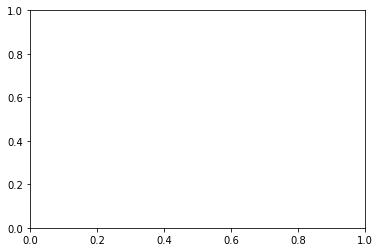